<a href="https://colab.research.google.com/github/archivesunleashed/notebooks/blob/main/arch/spreadsheet-information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spreadsheet Information Dataset Exploration

We're going to take a look at a few examples of how we can explore the Spreadsheet Information dataset. 

The first thing we need to do is enter the URL for our Spreadsheet Information dataset in the cell below. You can get this by right clicking the Download icon, and selecting "Copy Link".

In [1]:
dataset = 'https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-14489/SpreadsheetInformationExtraction/spreadsheet-information.csv.gz?access=HDUPRBLGIKSXDPG7UY45Z5JYEAWCXC45' #@param {type:"string"}
print(dataset)

https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-14489/SpreadsheetInformationExtraction/spreadsheet-information.csv.gz?access=HDUPRBLGIKSXDPG7UY45Z5JYEAWCXC45


## pandas

Next, we'll setup our environment so we can load our Spreadsheet Information dataset into [pandas](https://pandas.pydata.org) DataFrames. If you're unfamiliar with DataFrames, but you've worked with Spreadsheets before, you should feel comfortable pretty quick.

In [2]:
import pandas as pd

## Data Table Display

Colab includes an extension that renders pandas DataFrames into interactive displays that can be filtered, sorted, and explored dynamically. This can be very useful for taking a look at what each DataFrame provides, and doing some intital filtering!

Data table display for pandas DataFrames can be enabled by running:
```python
%load_ext google.colab.data_table
```
and disabled by running
```python
%unload_ext google.colab.data_table
```

In [3]:
%load_ext google.colab.data_table

## Loading our ARCH Dataset as a DataFrame

---


Next, we'll create pandas DataFrame from our dataset, and show a preview of it using the Data Table Display.

In [4]:
spreadsheet = pd.read_csv(dataset, compression='gzip')
spreadsheet

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,md5,sha1
0,20200630021557,https://epop-data.phys.ucalgary.ca/swarmE-swar...,swarmE-swarmABC_conjunctions_2020-06-29.csv,txt,text/csv,text/plain,65eb198daf9b5b6cefd966b7beec4b3e,2d4fb457a4e2c6dfc55f5757879f922dcd2a156f
1,20200702173302,https://live-risk.ucalgary.ca/risk/sites/defau...,fine-arts-owned-list-additions.xls,xls,application/vnd.ms-excel,application/vnd.ms-excel,c0f2464467a1e097480a6289f7c9f980,d6d893c83d629d1adf6d1291473cda9ee2abe0bb
2,20200702173305,https://live-risk.ucalgary.ca/risk/sites/defau...,property-claim-spreadsheet.xls,xls,application/vnd.ms-excel,application/vnd.ms-excel,bd4e22b2dc436da58741bcf101168bbd,6b9a961623b97d896224fe885566a0d04225b618
3,20200703073036,http://kremer.cpsc.ucalgary.ca/courses/seng403...,Peer-review.ods,ods,application/vnd.oasis.opendocument.spreadsheet,application/vnd.oasis.opendocument.spreadsheet,a28afe82f67091639f78da1d0e242459,7bef408a4d591bae6f170392760ab5a593865753
4,20200703105632,https://yycdatacollective.ucalgary.ca/dataset/...,historic_resources.csv,txt,text/csv,text/plain,5ccde3ee55c60281d4efa18835f48598,60aa57388a57ce2fb778555b9576babab13142d4
...,...,...,...,...,...,...,...,...
991,20220702155526,https://www.ucalgary.ca/finance/sites/default/...,fr-internal-chartfield-request-form.xls,xls,application/vnd.ms-excel,application/vnd.ms-excel,041424d977a2c9bb1c830d9e9698002d,ef50331f1c1679e9cc334f4255ad691e16ecfe92
992,20220702155729,https://www.ucalgary.ca/finance/sites/default/...,fo-payroll-one-time-lump-sum-payment-request-f...,xls,application/vnd.ms-excel,application/vnd.ms-excel,9c63fd688ef15898dddcd633c95025a8,cc2efb79088fb7518d9ccad30c591426520643d8
993,20220701221512,http://test-ipv6.csclub.uwaterloo.ca/site/grap...,graphdata.csv,txt,text/csv,text/plain,626af5dee23c641b556658cd2f6217a2,dcd11f2980fec01ca7a90d76974dc20341cf4d1a
994,20220702011404,http://test-ipv6.csclub.uwaterloo.ca/site/grap...,graphdata_100.csv,txt,text/csv,text/plain,24e84976685afb7d1cb1fd2dacef3deb,e7886bf042c75e49f7a6119c55e99518c84cebfe


# Data Analysis

Now that we have all of our datasets loaded up, we can begin to work with them!

## Counting total files, and unique files

Let's take a quick look at how to count items in DataFrames, and use total and unique files as an example to work with.

It's definitely work checking out the [pandas documentation](https://pandas.pydata.org/docs/index.html). There are a lot of good examples available, along with a robust [API reference](https://pandas.pydata.org/docs/reference/index.html#api).


### How many spreadsheet files are in this collection?

We can take our `spreadsheet` variable and try a couple of functions to get the same answer.

1.   `len(spreadsheet.index)`
  * Get the length of the DataFrame's index.
2.   `spreadsheet.shape[0]`
  * Get the shape or dimensionality of the DataFrame, and take the first item in the tuple.
3.  `spreadsheet.count()`
  * Count the number of rows for each column.



In [5]:
len(spreadsheet.index)

996

In [6]:
spreadsheet.shape[0]

996

In [7]:
spreadsheet.count()

crawl_date              996
url                     996
filename                996
extension               996
mime_type_web_server    996
mime_type_tika          918
md5                     996
sha1                    996
dtype: int64

### How many unique spreadsheet files are in the collection?

 We can see if a Spreadsheet file is unique or not by computing an [MD5 hash](https://en.wikipedia.org/wiki/MD5#MD5_hashes) of it, and comparing them. The exact same Spreadsheet file might have a filename of `example.csv` or `foo.csv`. If the hash is computed for each, we can see that even with different file names, they are actually the same Spreadsheet file. So, since we have both a `MD5` and `SHA1` hash column available in our DataFrame, we can just find the unique values, and count them!




In [8]:
len(spreadsheet.md5.unique())

848

### What are the top 10 most occurring Spreadsheet files in the collection?

Here we can take advantage of [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) to provide us with a list of MD5 hashes, and their respective counts.

In [9]:
spreadsheet["md5"].value_counts().head(10)

d41d8cd98f00b204e9800998ecf8427e    78
86dc54c9a4726f31a15a074d5512fbad     2
af35f09c7ff4ec7abef56296701589c2     2
a73e1e90ad8b0e754463288d0c2e1682     2
c0c6ec278dd15402ca691c8e2b8d651a     2
a1a6c5da2ca54b4a15cd565ceac6d239     2
7bbd6286688833956a06a6cfd7292c15     2
34c6b8de5a6166f12f5dd64771646ff7     2
4299ff28636402bd7df153a35446169a     2
77ff96c86174b54ef74d7a70eec39cdb     2
Name: md5, dtype: int64


### What's the information around all of the occurances of `d41d8cd98f00b204e9800998ecf8427e`?

What, you mean you don't know what `d41d8cd98f00b204e9800998ecf8427e` means? 

Let's find those Spreadsheet files in the DataFrame. We can here see some of the filenames used and information about the files.


In [10]:
spreadsheet.loc[spreadsheet["md5"] == "d41d8cd98f00b204e9800998ecf8427e"]

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,md5,sha1
254,20200703061939,https://arts.uwaterloo.ca/~tmparker/courses/72...,gas.csv,csv,text/csv,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709
596,20200706080855,https://cforall.uwaterloo.ca/trac/query?status...,query,unknown,text/csv,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709
597,20200706080904,https://cforall.uwaterloo.ca/trac/query?status...,query,unknown,text/tab-separated-values,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709
598,20200706081016,https://cforall.uwaterloo.ca/trac/query?status...,query,unknown,text/csv,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709
599,20200706081026,https://cforall.uwaterloo.ca/trac/query?status...,query,unknown,text/tab-separated-values,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709
...,...,...,...,...,...,...,...,...
982,20220101211452,https://arts.uwaterloo.ca/~tmparker/621/data/f...,fultonfish.csv,csv,text/csv,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709
983,20220101222855,https://arts.uwaterloo.ca/~tmparker/621/data/w...,wages.csv,csv,text/csv,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709
986,20220103184529,https://crysp.uwaterloo.ca/software/leadingjoh...,master.csv,csv,text/csv,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709
987,20220103184531,https://crysp.uwaterloo.ca/software/leadingjoh...,codingkey.csv,csv,text/csv,NaN,d41d8cd98f00b204e9800998ecf8427e,da39a3ee5e6b4b0d3255bfef95601890afd80709


### What are the top 10 most occuring filenames in the collection?

Note that this is of course different than the MD5 results up above. Here we are focusing _just_ on filename. So `gas.csv` for example, might actually be referring to different Spreadsheet files who happen to have the same name.

Here we can use `value_counts()` again, but this time we'll create a variable for the top filenames so we can use it later.



In [11]:
top_filenames = spreadsheet["filename"].value_counts().head(10)
top_filenames

query                220
rows.csv              19
get.php               10
report                10
graphdata.csv          5
graphdata_100.csv      5
6                      4
3                      4
2                      4
1                      4
Name: filename, dtype: int64

### Let's create our first graph!

We'll first plot the data with the pandas [plot](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) functionality, and then with [Altair](https://altair-viz.github.io/).

Text(0, 0.5, 'Count')

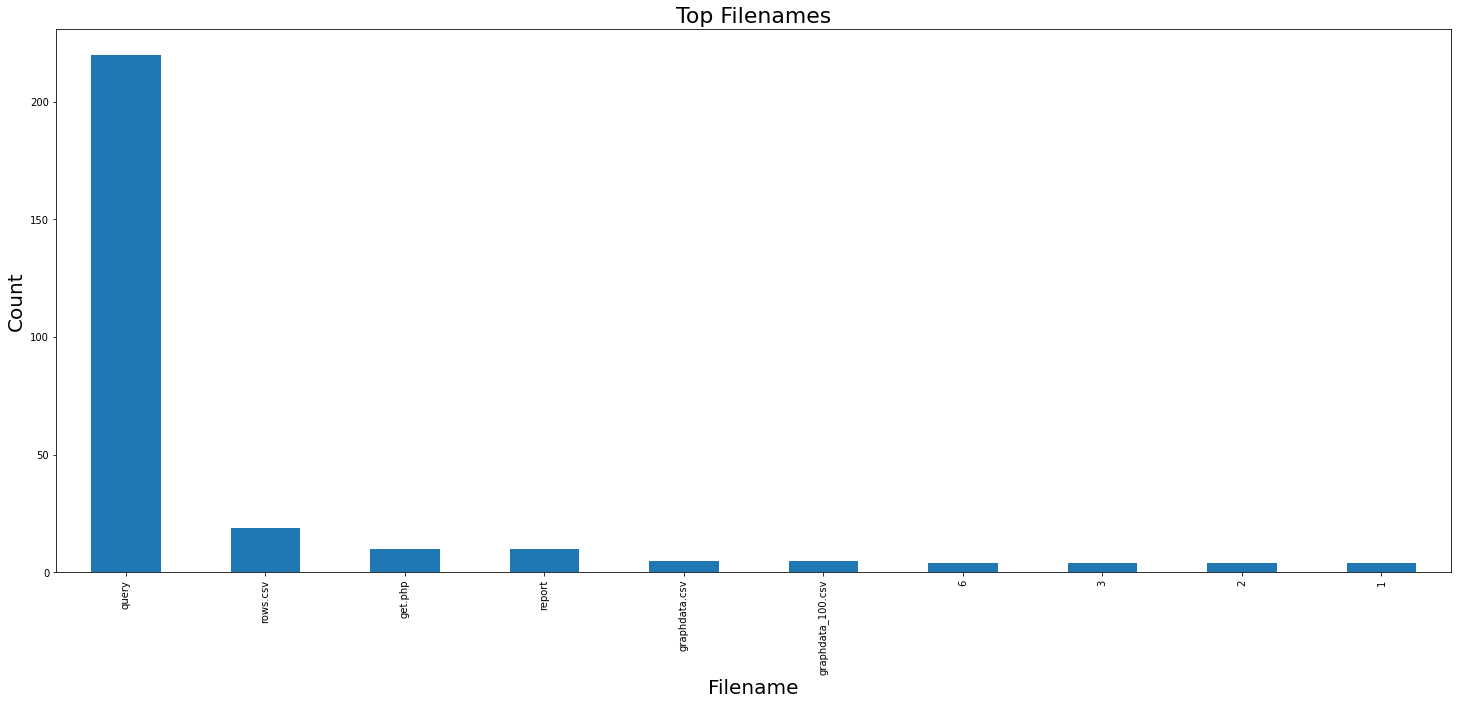

In [12]:
top_filenames_chart = top_filenames.plot.bar(figsize=(25, 10))

top_filenames_chart.set_title("Top Filenames", fontsize=22)
top_filenames_chart.set_xlabel("Filename", fontsize=20)
top_filenames_chart.set_ylabel("Count", fontsize=20)

Now let's setup [Altair](https://altair-viz.github.io/), and plot the data. Altair is useful for creating vizualizations since they can be easily exported as a PNG or SVG.

In [13]:
import altair as alt

In [14]:
top_filenames_altair = (
    spreadsheet["filename"]
    .value_counts()
    .head(10)
    .rename_axis("Filename")
    .reset_index(name="Count")
)

filenames_bar = (
    alt.Chart(top_filenames_altair)
    .mark_bar()
    .encode(x=alt.X("Filename:O", sort="-y"), y=alt.Y("Count:Q"))
)

filenames_rule = (
    alt.Chart(top_filenames_altair).mark_rule(color="red").encode(y="mean(Count):Q")
)


filenames_text = filenames_bar.mark_text(align="center", baseline="bottom").encode(
    text="Count:Q"
)

(filenames_bar + filenames_rule + filenames_text).properties(
    width=1400, height=700, title="Top Filenames"
)

alt.LayerChart(...)

### How about a file format distribution?

What _kind_ of Spreadsheet files are present? We can discover this by checking their "media type", or [MIME type](https://en.wikipedia.org/wiki/Media_type). 






In [15]:
spreadsheet_mime_types = (
    spreadsheet["mime_type_tika"]
    .value_counts()
    .head(5)
    .rename_axis("MIME Type")
    .reset_index(name="Count")
)

spreadsheet_mimes_bar = (
    alt.Chart(spreadsheet_mime_types)
    .mark_bar()
    .encode(x=alt.X("MIME Type:O", sort="-y"), y=alt.Y("Count:Q"))
)

spreadsheet_mime_rule = (
    alt.Chart(spreadsheet_mime_types).mark_rule(color="red").encode(y="mean(Count):Q")
)

spreadsheet_mime_text = spreadsheet_mimes_bar.mark_text(align="center", baseline="bottom").encode(
    text="Count:Q"
)

(spreadsheet_mimes_bar + spreadsheet_mime_rule + spreadsheet_mime_text).properties(
    width=1400, height=700, title="Spreadsheet File Format Distribution"
)

alt.LayerChart(...)

### How do I get the actual Spreadsheet File?

...or, how do I get to the actual binary files described by each file format information derivative?

There are a few options!

1. `wget` or `curl` from the live URL, or a replay URL
  * Live web URL
    * `wget` or `curl` the value of the `url` column
  * Replay web URL
    * `wget` or `curl` the value of the `crawl_date` and `url` column using the following pattern:
      * `https://web.archive.org/web/` + `crawl_date` + `/` + `url`
        * https://web.archive.org/web/20120119124734/http://www.archive.org/images/glogo.png
      * `http://wayback.archive-it.org/14462/` + `crawl_date` + `/` + `url`
        * https://wayback.archive-it.org/14462/20210524212740/https://ruebot.net/visualization/elxn42/featured_hu33a17dfb90e2c5ed77f783db14a6e53a_5126291_550x0_resize_q90_box_2.png
2. Use a scripting language, such as Python
  * Make use of the `url` and `filename` columns (and `crawl_date` if you want to use the replay URL)
  * `import requests`
  * `requests.get(url, allow_redirects=True)`
  * `open('filename', 'wb').write(r.content)`
3. Use the [Archives Unleashed Toolkit](https://aut.docs.archivesunleashed.org/docs/extract-binary) (if you have access to the W/ARC files).

If you wanted to download the Spreadsheet files using the replay URL, below is a method for doing so.

First, you'll want to setup a replay url base url. Here we'll use the Archive-It Wayback instance for the collection.

In [16]:
wayback_url = 'http://wayback.archive-it.org/14489/'

Next we'll create a new column using a lambda function. If you're familiar working with Spreadsheets, what we're doing here is basically concatenating some column values together and creating a new column.

In [17]:
spreadsheet['replay_url'] = spreadsheet.apply(lambda row: str(wayback_url + str(row['crawl_date']) + "/" + row['url']), axis=1)

Then we can export that new column we created out to a file, so we can use it with `wget` to download all the Spreadsheet files!

In [18]:
spreadsheet['replay_url'].head().to_csv('14489_spreadsheet_urls.txt', index=False, header=False)

Finally, we can pass the file to `wget` to use as a download list. You can also speed this process up using `xargs` or `parallel`.

In [19]:
!wget --random-wait -i 14489_spreadsheet_urls.txt

--2022-11-24 14:18:59--  http://wayback.archive-it.org/14489/20200630021557/https://epop-data.phys.ucalgary.ca/swarmE-swarmABC_conjunctions_2020-06-29.csv
Resolving wayback.archive-it.org (wayback.archive-it.org)... 207.241.232.8, 207.241.225.8
Connecting to wayback.archive-it.org (wayback.archive-it.org)|207.241.232.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237871 (232K) [text/csv]
Saving to: ‘swarmE-swarmABC_conjunctions_2020-06-29.csv.1’

swarmE-swarmABC_con 100%[===================>] 232.30K  --.-KB/s    in 0.08s   

2022-11-24 14:19:00 (2.97 MB/s) - ‘swarmE-swarmABC_conjunctions_2020-06-29.csv.1’ saved [237871/237871]

--2022-11-24 14:19:00--  http://wayback.archive-it.org/14489/20200702173302/https://live-risk.ucalgary.ca/risk/sites/default/files/teams/16/fine-arts-owned-list-additions.xls
Reusing existing connection to wayback.archive-it.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 25600 (25K) [application/vnd.ms-excel]
Saving t